<a href="https://colab.research.google.com/github/Kasabulatov/Lesson2/blob/master/History_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%MATPLOTLIB INLINE

UsageError: Line magic function `%MATPLOTLIB` not found.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1jw76Adc-amYOLY1ala4QEOgR15JQm8IQ'

In [65]:
fluff, id = link.split('=')
print (id)

1jw76Adc-amYOLY1ala4QEOgR15JQm8IQ


**<h1>Download the data**

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('hist1.csv')  
df = pd.read_csv('hist1.csv')

In [83]:
df.head()

,Data,ObjectName,ObjectGUID,Pomeshcheniye,PomeshcheniyeGUID,DataVygruzki,Price,Etazh,Uglovaya,StoronySveta,Vidovaya,VidVoDvor,Cost,Area,PloshadVnutrenaya,RoomsCount,KolichestvoStoron,Podezd,Class,City,MaterialSten,Status,AgreementDate,SalePrice,Summa,ProcentVznosa,Aktsiya,AktsiyaGUID,DateOfSalesStart,FirstPrice,PloshadVnutrenayaPoTP,PloshadBalkonaPoTP,ZhilayaPloshadPoTP
0,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,47,fbad23f0-cb88-11e8-80d7-00155da7893d,2019-01-26 07:09:29,322500.0,7,0,NaN,1,1,18691294.0,57.96,54.71,2,Двухсторонняя,2,Комфорт,Астана,Кирпич силикатный,Свободно,NaN,322500.0,0.0,0,NaN,NaN,2018-11-28,317000.0,0.0,0.0,0.0
1,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,38 ЧО,fbad23f1-cb88-11e8-80d7-00155da7893d,2019-01-26 07:09:29,329500.0,5,0,В,1,1,11976501.0,36.35,34.18,1,Односторонняя,2,Комфорт,Астана,Кирпич силикатный,Свободно,NaN,329500.0,0.0,0,NaN,NaN,2018-11-28,323000.0,0.0,0.0,0.0
2,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,39 ЧО,fbad23f4-cb88-11e8-80d7-00155da7893d,2019-01-26 07:09:29,329500.0,5,0,В,1,1,11900716.0,36.12,33.95,1,Односторонняя,2,Комфорт,Астана,Кирпич силикатный,Свободно,NaN,329500.0,0.0,0,NaN,NaN,2018-11-28,323000.0,0.0,0.0,0.0
3,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,49,fbad23f6-cb88-11e8-80d7-00155da7893d,2019-01-26 07:09:29,329500.0,7,0,В,1,1,11900716.0,36.12,33.95,1,Односторонняя,2,Комфорт,Астана,Кирпич силикатный,Свободно,NaN,329500.0,0.0,0,NaN,NaN,2018-11-28,323000.0,0.0,0.0,0.0
4,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,45,fbad23f8-cb88-11e8-80d7-00155da7893d,2019-01-26 07:09:29,322500.0,6,0,NaN,0,1,19040400.0,59.04,56.10,2,Двухсторонняя,2,Комфорт,Астана,Кирпич силикатный,Свободно,NaN,322500.0,0.0,0,NaN,NaN,2018-11-28,317000.0,0.0,0.0,0.0


In [134]:
df['StoronySveta'].value_counts()

В     200305
С     192263
Ю     133910
З     106542
ЮЗ      4405
ЮВ      1507
СЗ       883
СВ       330
Name: StoronySveta, dtype: int64

In [68]:
df.shape

(2978443, 34)

In [75]:
df.columns

Index(['Unnamed: 0', 'Data', 'ObjectName', 'ObjectGUID', 'Pomeshcheniye',
       'PomeshcheniyeGUID', 'DataVygruzki', 'Price', 'Etazh', 'Uglovaya',
       'StoronySveta', 'Vidovaya', 'VidVoDvor', 'Cost', 'Area',
       'PloshadVnutrenaya', 'RoomsCount', 'KolichestvoStoron', 'Podezd',
       'Class', 'City', 'MaterialSten', 'Status', 'AgreementDate', 'SalePrice',
       'Summa', 'ProcentVznosa', 'Aktsiya', 'AktsiyaGUID', 'DateOfSalesStart',
       'FirstPrice', 'PloshadVnutrenayaPoTP', 'PloshadBalkonaPoTP',
       'ZhilayaPloshadPoTP'],
      dtype='object')

In [0]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [77]:
df.columns

Index(['Data', 'ObjectName', 'ObjectGUID', 'Pomeshcheniye',
       'PomeshcheniyeGUID', 'DataVygruzki', 'Price', 'Etazh', 'Uglovaya',
       'StoronySveta', 'Vidovaya', 'VidVoDvor', 'Cost', 'Area',
       'PloshadVnutrenaya', 'RoomsCount', 'KolichestvoStoron', 'Podezd',
       'Class', 'City', 'MaterialSten', 'Status', 'AgreementDate', 'SalePrice',
       'Summa', 'ProcentVznosa', 'Aktsiya', 'AktsiyaGUID', 'DateOfSalesStart',
       'FirstPrice', 'PloshadVnutrenayaPoTP', 'PloshadBalkonaPoTP',
       'ZhilayaPloshadPoTP'],
      dtype='object')

In [0]:
df['Uglovaya'] = df['Uglovaya'].astype('int')
df['Vidovaya'] = df['Vidovaya'].astype('int')
df['VidVoDvor'] = df['VidVoDvor'].astype('int')

**<h1>Missing data**

In [138]:
#Top20 columns with null values by ascending order

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
AktsiyaGUID,2970596,0.997365
Aktsiya,2970596,0.997365
AgreementDate,2966609,0.996027
StoronySveta,2338298,0.785074
MaterialSten,4746,0.001593
KolichestvoStoron,3401,0.001142
City,132,0.000044
DateOfSalesStart,37,0.000012
Vidovaya,0,0.000000
Uglovaya,0,0.000000


In [115]:
df['StoronySveta'].value_counts()

В     200305
С     192263
Ю     133910
З     106542
ЮЗ      4405
ЮВ      1507
СЗ       883
СВ       330
Name: StoronySveta, dtype: int64

**<h1>Status что с ним делать?**

In [109]:
df['Status'].value_counts()

Свободно    2869629
Резерв        54227
Бронь         42753
Продано       11834
Name: Status, dtype: int64

In [111]:
df['City'].value_counts()

Астана     2444676
Алматы      506131
Атырау       25527
Бурабай       1977
Name: City, dtype: int64

In [114]:
df['ObjectName'].nunique()

203

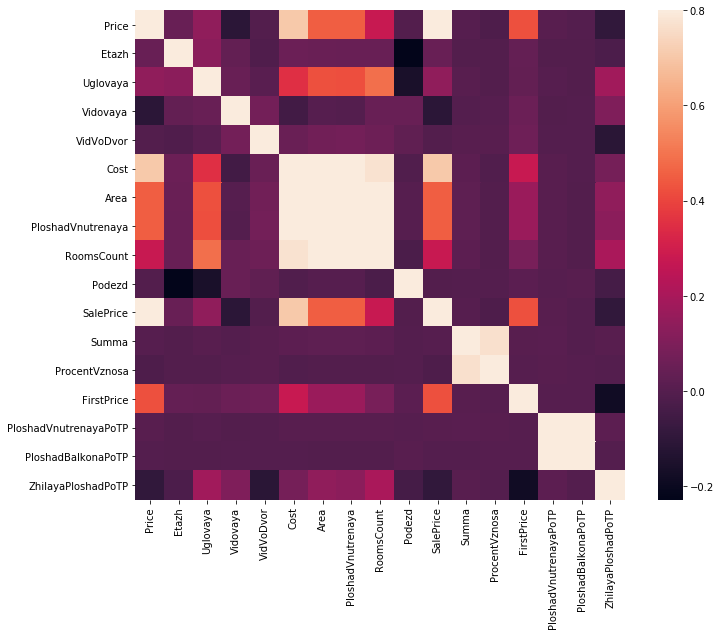

In [96]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

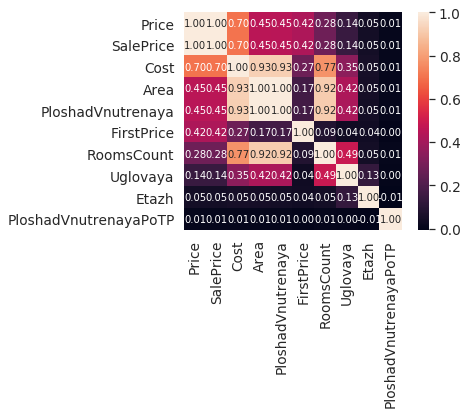

In [108]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**<h1>Without 'Svobodno'**

In [0]:
data = df[df['Status'] != 'Свободно']

In [136]:
data.shape

(108814, 33)

In [161]:
data['City'].value_counts()

Астана     72020
Алматы     34684
Атырау      2087
Бурабай       23
Name: City, dtype: int64

In [137]:
data.head()

,Data,ObjectName,ObjectGUID,Pomeshcheniye,PomeshcheniyeGUID,DataVygruzki,Price,Etazh,Uglovaya,StoronySveta,Vidovaya,VidVoDvor,Cost,Area,PloshadVnutrenaya,RoomsCount,KolichestvoStoron,Podezd,Class,City,MaterialSten,Status,AgreementDate,SalePrice,Summa,ProcentVznosa,Aktsiya,AktsiyaGUID,DateOfSalesStart,FirstPrice,PloshadVnutrenayaPoTP,PloshadBalkonaPoTP,ZhilayaPloshadPoTP
76,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,152,7bd30cf5-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,314500.0,2,1,NaN,0,0,18274809.0,58.11,53.30,2,Двухсторонняя,6,Комфорт,Астана,Кирпич силикатный,Резерв,NaN,314500.0,0.0,0,NaN,NaN,2018-11-28,309000.0,0.0,0.0,0.0
77,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,153,7bd30cf6-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,307300.0,2,1,NaN,0,1,26017555.0,84.67,81.98,3,Двухсторонняя,6,Комфорт,Астана,Кирпич силикатный,Резерв,NaN,307300.0,0.0,0,NaN,NaN,2018-11-28,306000.0,0.0,0.0,0.0
78,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,154,7bd30cf7-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,322500.0,3,1,NaN,0,0,18739669.0,58.11,53.30,2,Двухсторонняя,6,Комфорт,Астана,Кирпич силикатный,Резерв,NaN,322500.0,0.0,0,NaN,NaN,2018-11-28,317000.0,0.0,0.0,0.0
79,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,155,7bd30cf8-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,313300.0,3,1,NaN,0,1,26531811.0,84.69,82.00,3,Двухсторонняя,6,Комфорт,Астана,Кирпич силикатный,Резерв,NaN,313300.0,0.0,0,NaN,NaN,2018-11-28,312000.0,0.0,0.0,0.0
80,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,156,7bd30cf9-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,329200.0,3,0,Ю,1,1,13424776.0,40.78,38.17,1,Односторонняя,6,Комфорт,Астана,Кирпич силикатный,Резерв,NaN,329200.0,0.0,0,NaN,NaN,2018-11-28,323000.0,0.0,0.0,0.0


In [139]:
#Top20 columns with null values by ascending order

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data2.head(20)

,Total,Percent
AktsiyaGUID,100967,0.927886
Aktsiya,100967,0.927886
AgreementDate,96980,0.891246
StoronySveta,90339,0.830215
MaterialSten,50,0.000459
KolichestvoStoron,23,0.000211
DateOfSalesStart,23,0.000211
VidVoDvor,0,0.000000
Vidovaya,0,0.000000
Uglovaya,0,0.000000


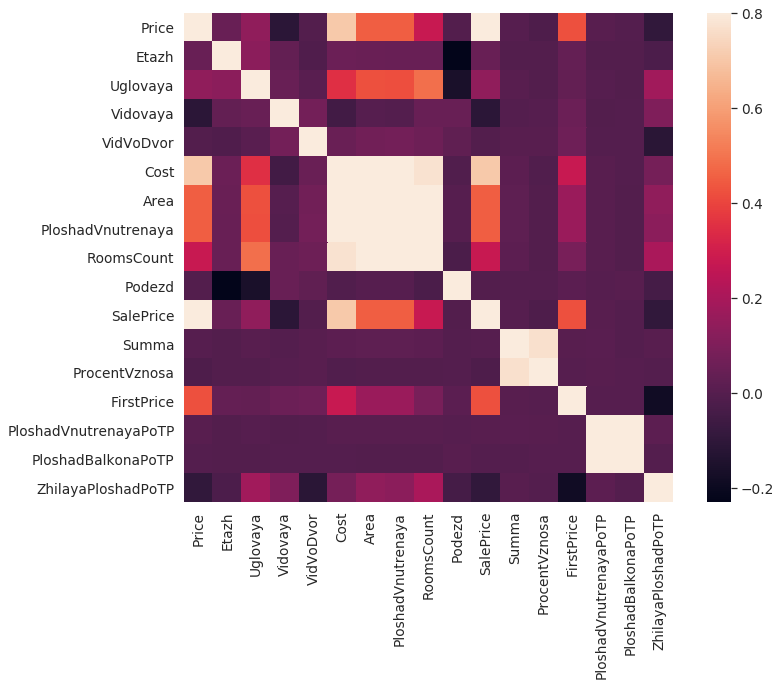

In [162]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

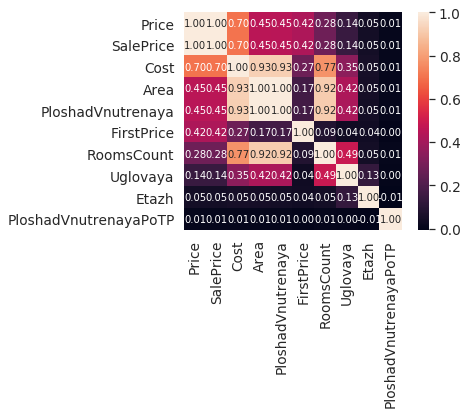

In [141]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [145]:
data.columns

Index(['Data', 'ObjectName', 'ObjectGUID', 'Pomeshcheniye',
       'PomeshcheniyeGUID', 'DataVygruzki', 'Price', 'Etazh', 'Uglovaya',
       'StoronySveta', 'Vidovaya', 'VidVoDvor', 'Cost', 'Area',
       'PloshadVnutrenaya', 'RoomsCount', 'KolichestvoStoron', 'Podezd',
       'Class', 'City', 'MaterialSten', 'Status', 'AgreementDate', 'SalePrice',
       'Summa', 'ProcentVznosa', 'Aktsiya', 'AktsiyaGUID', 'DateOfSalesStart',
       'FirstPrice', 'PloshadVnutrenayaPoTP', 'PloshadBalkonaPoTP',
       'ZhilayaPloshadPoTP'],
      dtype='object')

In [146]:
data.drop(['SalePrice','PloshadVnutrenaya','Summa','ProcentVznosa', 'PloshadVnutrenayaPoTP', 'PloshadBalkonaPoTP', 'ZhilayaPloshadPoTP', 'StoronySveta', 'AgreementDate', 'Aktsiya', 'AktsiyaGUID'],
         axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [180]:
data.drop('Status',axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [147]:
data.columns

Index(['Data', 'ObjectName', 'ObjectGUID', 'Pomeshcheniye',
       'PomeshcheniyeGUID', 'DataVygruzki', 'Price', 'Etazh', 'Uglovaya',
       'Vidovaya', 'VidVoDvor', 'Cost', 'Area', 'RoomsCount',
       'KolichestvoStoron', 'Podezd', 'Class', 'City', 'MaterialSten',
       'Status', 'DateOfSalesStart', 'FirstPrice'],
      dtype='object')

In [159]:
data.shape

(108814, 22)

In [181]:
data.head()

,Data,ObjectName,ObjectGUID,Pomeshcheniye,PomeshcheniyeGUID,DataVygruzki,Price,Etazh,Uglovaya,Vidovaya,VidVoDvor,Cost,Area,RoomsCount,KolichestvoStoron,Podezd,Class,City,MaterialSten,DateOfSalesStart,FirstPrice
76,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,152,7bd30cf5-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,314500.0,2,1,0,0,18274809.0,58.11,2,2.0,6,2,Астана,Кирпич силикатный,2018-11-28,309000.0
77,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,153,7bd30cf6-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,307300.0,2,1,0,1,26017555.0,84.67,3,2.0,6,2,Астана,Кирпич силикатный,2018-11-28,306000.0
78,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,154,7bd30cf7-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,322500.0,3,1,0,0,18739669.0,58.11,2,2.0,6,2,Астана,Кирпич силикатный,2018-11-28,317000.0
79,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,155,7bd30cf8-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,313300.0,3,1,0,1,26531811.0,84.69,3,2.0,6,2,Астана,Кирпич силикатный,2018-11-28,312000.0
80,2019-01-26,Арнау - 8,f1709d5d-97ea-11e4-bd2b-0025906b4dd5,156,7bd30cf9-cd07-11e8-80d7-00155da7893d,2019-01-26 07:09:29,329200.0,3,0,1,1,13424776.0,40.78,1,1.0,6,2,Астана,Кирпич силикатный,2018-11-28,323000.0


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108814 entries, 76 to 2978442
Data columns (total 21 columns):
Data                 108814 non-null object
ObjectName           108814 non-null object
ObjectGUID           108814 non-null object
Pomeshcheniye        108814 non-null object
PomeshcheniyeGUID    108814 non-null object
DataVygruzki         108814 non-null datetime64[ns]
Price                108814 non-null float64
Etazh                108814 non-null int64
Uglovaya             108814 non-null int64
Vidovaya             108814 non-null int64
VidVoDvor            108814 non-null int64
Cost                 108814 non-null float64
Area                 108814 non-null float64
RoomsCount           108814 non-null int64
KolichestvoStoron    108791 non-null float64
Podezd               108814 non-null int64
Class                108814 non-null int64
City                 108814 non-null object
MaterialSten         108764 non-null object
DateOfSalesStart     108791 non-null datetime6

**<h2>Object to int**

In [170]:
data['KolichestvoStoron'].value_counts()

2.0    64399
1.0    44392
Name: KolichestvoStoron, dtype: int64

In [168]:
data['KolichestvoStoron'] = data['KolichestvoStoron'].map({'Односторонняя':1, 'Двухсторонняя':2})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
data['Class'].value_counts()

Комфорт     50006
Бизнес      32712
Стандарт    23274
Deluxe       2475
Премиум       347
Name: Class, dtype: int64

In [176]:
data['Class'] = data['Class'].map({'Стандарт':1, 'Комфорт':2, 'Бизнес':3, 'Deluxe':4, 'Премиум':5})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
data['MaterialSten'].value_counts()

Газоблок                                                                                                                                                70502
Кирпич силикатный                                                                                                                                        7966
Монолитный железобетон                                                                                                                                   6276
Панель                                                                                                                                                   5441
Вентилируемый фасад утеплитель каркас монолитный железобетонный стены из ячеистых блоков                                                                 4980
Блоки из ячеистого бетона толщ. 250мм.                                                                                                                   2484
Газоблок/железобетон                                

In [187]:
data['DataVygruzki'] = pd.to_datetime(data['DataVygruzki'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [189]:
data['DateOfSalesStart'] = pd.to_datetime(data['DateOfSalesStart'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


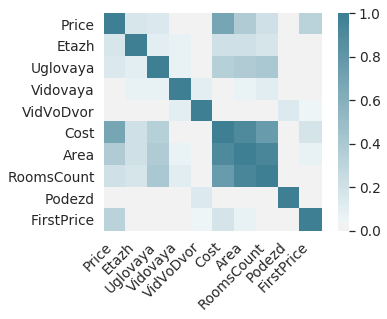

In [158]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

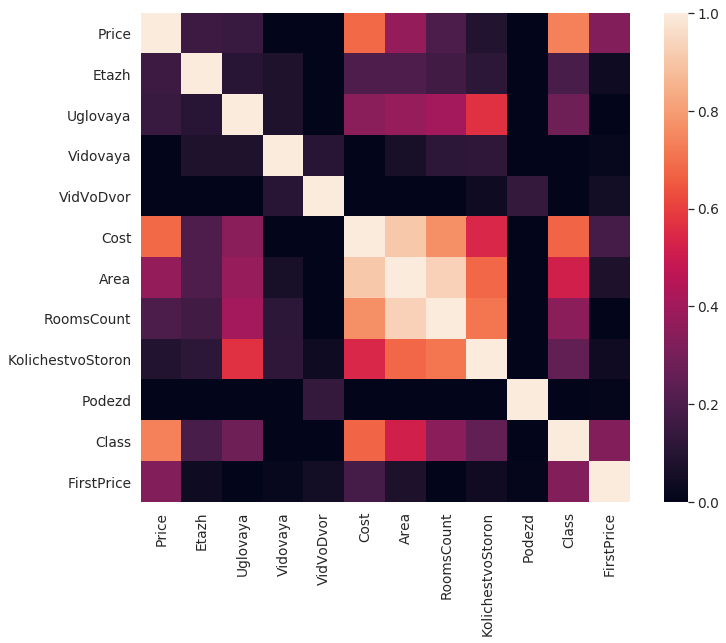

In [186]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0, vmax=1, square=True);

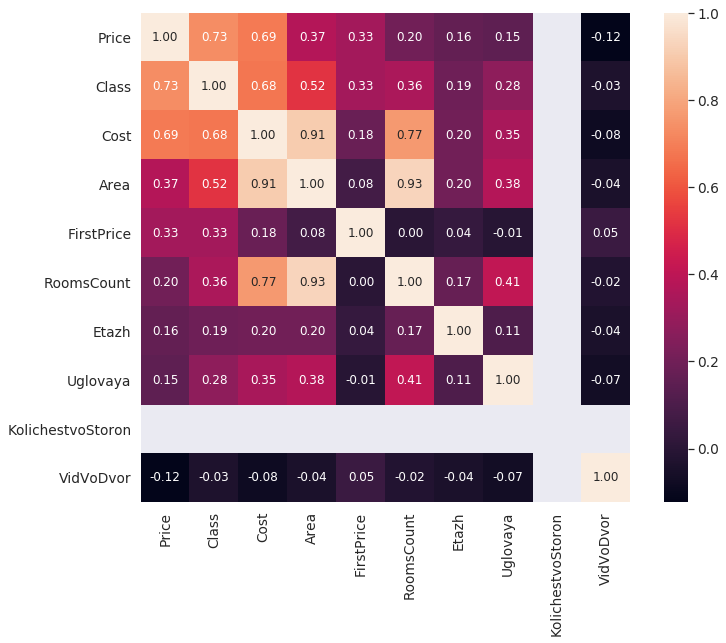

In [203]:
#price correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()